## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [1]:
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
customer_data=pd.read_csv('/Users/devirughani/Desktop/IronHack/Week_3/Day_5/Labs/lab-imbalanced-data/files_for_lab/customer_churn.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Extract the target variable which is a Yes or No.

y=customer_data[['Churn']]
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [5]:
# Extract the independent variables and scale them.

X = customer_data[['SeniorCitizen', 'MonthlyCharges','tenure']]
X

#X.isna().sum() No Na's

,SeniorCitizen,MonthlyCharges,tenure
0,0,29.85,1
1,0,56.95,34
2,0,53.85,2
3,0,42.30,45
4,0,70.70,2
...,...,...,...
7038,0,84.80,24
7039,0,103.20,72
7040,0,29.60,11
7041,1,74.40,4


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
# all features are numeric, so no need to split into _num and _cat
transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X.columns)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X.columns)
X_train_scaled.head()

#Create one of the two scaling methods we have seen (standard and minmax) as a Python function. 
#Remember that you need it to apply the changes to the test with the info from the train!

,SeniorCitizen,MonthlyCharges,tenure
0,0.0,0.309263,0.333333
1,1.0,0.468127,0.750000
2,0.0,0.218127,0.041667
3,0.0,0.019920,0.847222
4,0.0,0.659363,0.166667


In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [9]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

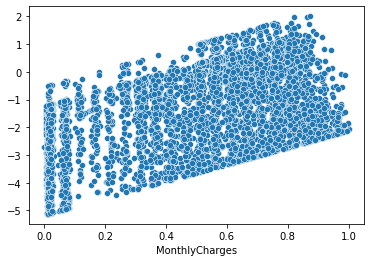

In [10]:
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
plt.show()

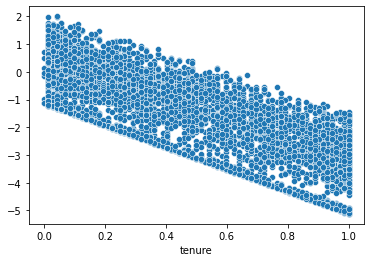

In [11]:
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

## Building out the logistic model prior to accounting for class imbalance

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.78


/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label = 'No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test,pos_label = 'No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label = 'No')))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.82
The recall in the TEST set is: 0.90
The F1 in the TEST set is: 0.86


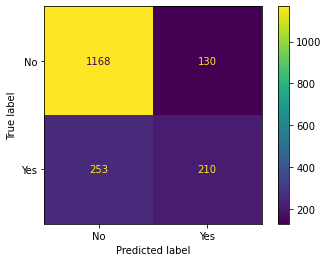

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


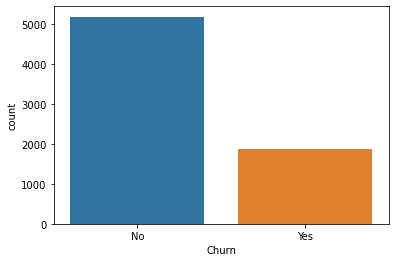

In [15]:
count_classes = customer_data['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = customer_data);
plt.show()

# Even a simple model will give us more than 70% accuracy. Why?

The scores claims that the model is more than 78% accurate. This is due to imabalance and the model is clearly better at predicting No than it is Yes as a result.

## Synthetic Minority Oversampling Technique (SMOTE) 

An oversampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sm = SMOTE(random_state=100,k_neighbors=7) #Default is 5 - do some trials
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [18]:
print(X_train_SMOTE.shape)
print(X_train_scaled.shape)

(7752, 3)
(5282, 3)


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test_SMOTE = lr.predict(X_test_scaled)


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_SMOTE)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_SMOTE,pos_label='No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_SMOTE, pos_label='No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_SMOTE, pos_label='No')))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.88
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.79


/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


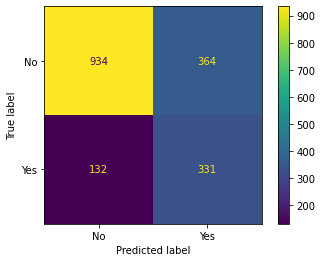

In [24]:
cm_test = confusion_matrix(y_test,y_pred_test_SMOTE)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

#While the precision score is better under the SMOTE technique, generally the model is slightly less accurate. However, this seems to be the trade-off for generating a more balanced data set.